<h1 style="color:rgb(0,120,170)">Assignment 4: PCA and Kernel PCA</h1>

This material, no matter whether in printed or electronic form, may be used for personal and non-commercial educational use only. Any reproduction of this material, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

<h2 style="color:rgb(0,120,170)">Theoretical aspects concerning PCA</h2>

Our aim is to discuss a certain aspect of the mathematical derivation of PCA, that has not been adressed in full detail in the lectures. We use the same notation as in the lecture, i.e. we are given a data matrix $\mathbf{X}= ( \mathbf{x}_1,...,\mathbf{x}_n )^\top$, where each $\mathbf{x}_i \in \mathbb{R}^m$ for $1\le i \le n$. 

A main reason, why PCA works very well, is the fact that the covariance matrix, defined as $\mathbf{C}=\frac 1n \mathbf{X}^T\mathbf{X}$, or equivalently, $c_{st}=\frac1n \sum_{i=1}^n x_{is} x_{it}$, is positive semi-definite. 
* Show this fact by proving $\left\langle\mathbf{C}\mathbf{a},\mathbf{a}  \right\rangle= \sum_{s,t=1}^m a_s a_t c_{st} \geq 0$ for any $\mathbf{a} \in \mathbb{R}^m$. 
* Moreover, show that positive semi-definiteness of $\mathbf{C}$ implies that all eigenvalues are non-negative. 
* Why is this an important fact in PCA? 

To show that $\mathbf{C}$ is positive semi-definite, we need to prove that $\left\langle\mathbf{C}\mathbf{a},\mathbf{a} \right\rangle \geq 0$ for any $\mathbf{a} \in \mathbb{R}^m$. Using the definition of the dot product and the fact that $\mathbf{C}=\frac{1}{n}\mathbf{X}^T\mathbf{X}$, we have:

\begin{align*}
\left\langle\mathbf{C}\mathbf{a},\mathbf{a} \right\rangle &= \mathbf{a}^T \mathbf{C}\mathbf{a} \
&= \mathbf{a}^T\frac{1}{n}\mathbf{X}^T\mathbf{X}\mathbf{a} \
&= \frac{1}{n}\sum_{i=1}^n \left(\mathbf{a}^T\mathbf{x}i\right)^2 \
&= \frac{1}{n}\sum{i=1}^n \sum_{s,t=1}^m a_s a_t x_{is} x_{it} \
&= \sum_{s,t=1}^m a_s a_t c_{st}
\end{align*}

Since each term in the sum is non-negative, we have $\left\langle\mathbf{C}\mathbf{a},\mathbf{a} \right\rangle \geq 0$ for any $\mathbf{a} \in \mathbb{R}^m$, which shows that $\mathbf{C}$ is positive semi-definite.

To show that positive semi-definiteness of $\mathbf{C}$ implies that all eigenvalues are non-negative, we can use the fact that a matrix is positive semi-definite if and only if all its eigenvalues are non-negative.

Let $\lambda$ be an eigenvalue of $\mathbf{C}$ with corresponding eigenvector $\mathbf{v}$. Then, we have:

\begin{align*}
\mathbf{C}\mathbf{v} &= \lambda\mathbf{v} \
\mathbf{v}^T\mathbf{C}\mathbf{v} &= \lambda\mathbf{v}^T\mathbf{v} \
\left\langle\mathbf{C}\mathbf{v},\mathbf{v} \right\rangle &= \lambda |\mathbf{v}|^2
\end{align*}

Since $\mathbf{C}$ is positive semi-definite, we have $\left\langle\mathbf{C}\mathbf{v},\mathbf{v} \right\rangle \geq 0$, which implies that $\lambda \geq 0$. Therefore, all eigenvalues of $\mathbf{C}$ are non-negative.

This is an important fact in PCA because the principal components are given by the eigenvectors of $\mathbf{C}$ corresponding to the largest eigenvalues. If some eigenvalues were negative, the corresponding principal components would not be well-defined. Therefore, the non-negativity of all eigenvalues ensures that PCA can be used to obtain meaningful principal components.

<h2 style="color:rgb(0,120,170)">PCA applied to real world data set</h2>

We use the provided data set faces94.csv which is essentially based
on the pictures from the collection of Facial Images 1. This data set consists of $45 \times 50$
gray scale pixel images.
Let us first read in the data and plot the first image as an example.
This exercise should give you a feeling of what it really means to preserve variance.

In [1]:
#read data. Nothing to do here
import numpy as np
from sklearn.decomposition import PCA, KernelPCA
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline 

# import data from csv file,
data = np.genfromtxt('faces94.csv', delimiter=',')

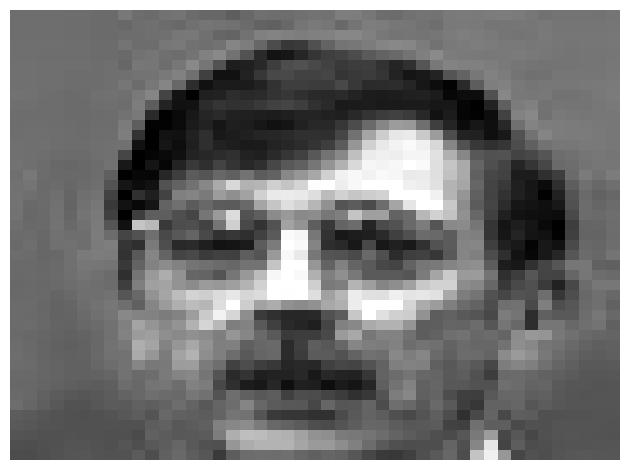

In [2]:
#plot first image as an example. Nothing to do here
def plotImg(x):
    fig, ax = plt.subplots()
    ax.pcolor(x.reshape(45, 50).T, cmap=cm.gray)
    ax.set_ylim([45, 0])
    ax.axis("off")
    fig.tight_layout()
    
# plot first img
plotImg(data[0, :])

<h3 style="color:rgb(210,90,80)">Exercise 2 (10 points):</h3>

We next use PCA for data-compression. Downproject the data using enough PCs to
explain $50 \% $, $75 \% $ and $99 \% $ of the variance. To do this use the sklearn-package. Print the number of principal components needed and also the explained variance for each of the tasks. 

In [4]:
# compute PCA
pca = PCA()
pca.fit(data)

# compute explained variance and cumulative sum
explained_variance = pca.explained_variance_ratio_
cumulative_sum = np.cumsum(explained_variance)

# find minimum number of principal components for each percentage of variance
n_components_50 = np.argmax(cumulative_sum >= 0.5) + 1
n_components_75 = np.argmax(cumulative_sum >= 0.75) + 1
n_components_99 = np.argmax(cumulative_sum >= 0.99) + 1

# print results
print(f"Number of principal components needed for 50% variance: {n_components_50}")
print(f"Explained variance for 50% variance: {np.sum(explained_variance[:n_components_50]):.2f}")
print(f"Number of principal components needed for 75% variance: {n_components_75}")
print(f"Explained variance for 75% variance: {np.sum(explained_variance[:n_components_75]):.2f}")
print(f"Number of principal components needed for 99% variance: {n_components_99}")
print(f"Explained variance for 99% variance: {np.sum(explained_variance[:n_components_99]):.2f}")

Number of principal components needed for 50% variance: 4
Explained variance for 50% variance: 0.51
Number of principal components needed for 75% variance: 18
Explained variance for 75% variance: 0.76
Number of principal components needed for 99% variance: 367
Explained variance for 99% variance: 0.99


<h3 style="color:rgb(0,120,170)">Exercise 3 (10 points):</h3>

You have essentially compressed vectors of dimension $d = 2250$ into vectors of much smaller dimension. Implement a function, that decompresses the data again, i.e. reconstruct the $2250$ dimensional data points, given the lower-dimensional representation. Print the dimension of the back-transformed data and the back-transformed data itself to check, if your result is indeed correct. 

Dimensions of reconstructed data: (3059, 2250)


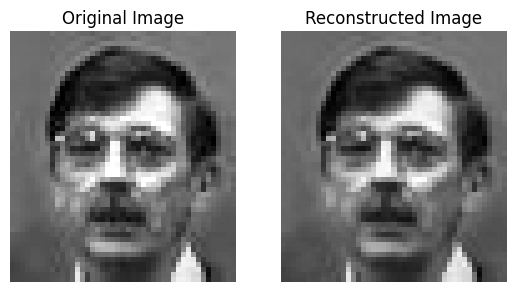

In [21]:
# apply inverse transformation to compressed data
compressed_data = pca.transform(data)
reconstructed_data = pca.inverse_transform(compressed_data)

# print dimensions of reconstructed data
print("Dimensions of reconstructed data:", reconstructed_data.shape)

# plot first original and reconstructed image for comparison
fig, ax = plt.subplots(1, 2)
ax[0].imshow(data[0].reshape(45,50).T, cmap=cm.gray)
ax[0].set_title("Original Image")
ax[0].axis("off")
ax[1].imshow(reconstructed_data[0].reshape(45,50).T, cmap=cm.gray)
ax[1].set_title("Reconstructed Image")
ax[1].axis("off")
plt.show()

<h3 style="color:rgb(210,90,80)">Exercise 4 (15 points):</h3>

Plot a few of the images and their reconstructions with $50 \% $, $75 \% $ and $99 \% $ of the variance.

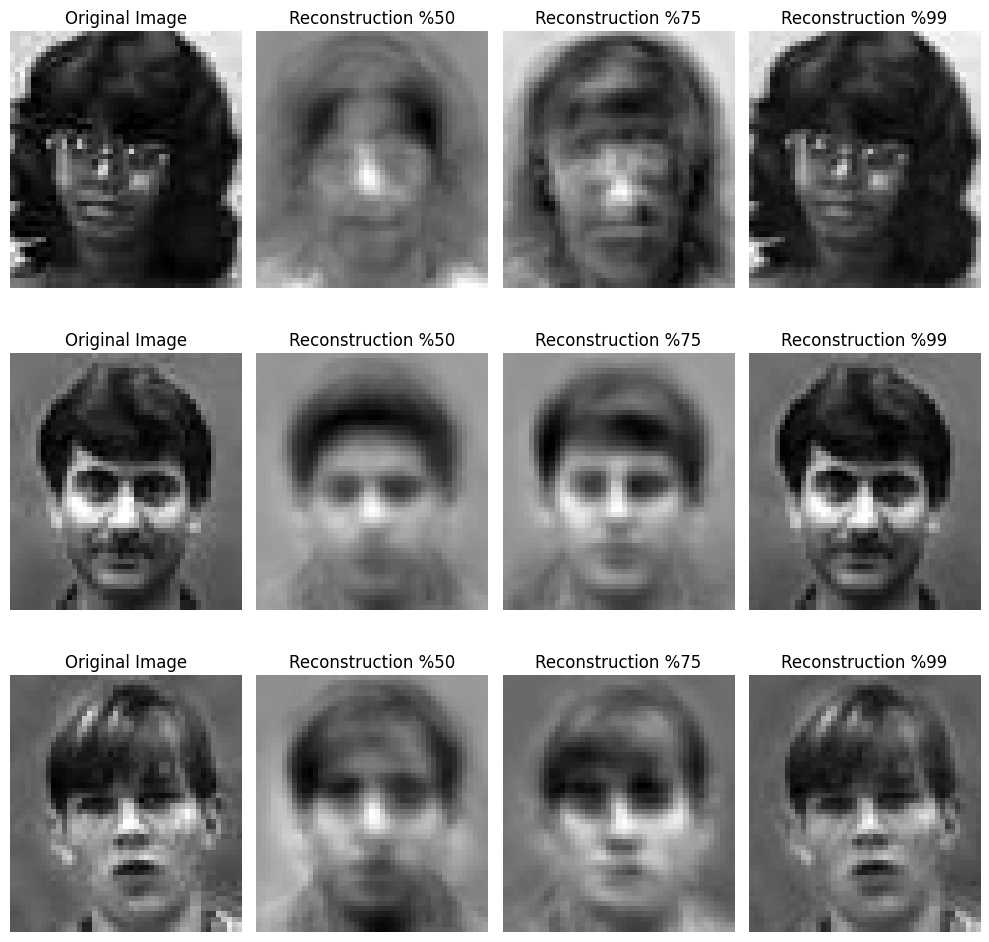

In [26]:
# plot original images and their reconstructions for different percentages of variance
fig, axs = plt.subplots(3, 4, figsize=(10, 10))
for i in range(3):
    # randomly select an image
    index = np.random.randint(0, len(data))
    img = data[index]

    # plot original image
    axs[i, 0].imshow(img.reshape(45, 50).T, cmap=cm.gray)
    axs[i, 0].set_title("Original Image")
    axs[i, 0].axis("off")

    # compute compressed representation for different percentages of variance
    pca_50 = PCA(n_components=n_components_50)
    pca_50.fit(data)
    pca_75 = PCA(n_components=n_components_75)
    pca_75.fit(data)
    pca_99 = PCA(n_components=n_components_99)
    pca_99.fit(data)
    compressed_50 = pca_50.transform(img.reshape(1, -1))
    compressed_75 = pca_75.transform(img.reshape(1, -1))
    compressed_99 = pca_99.transform(img.reshape(1, -1))

    # reconstruct images and plot them
    reconstructed_50 = pca_50.inverse_transform(compressed_50)
    reconstructed_75 = pca_75.inverse_transform(compressed_75)
    reconstructed_99 = pca_99.inverse_transform(compressed_99)
    axs[i, 1].imshow(reconstructed_50.reshape(45, 50).T, cmap=cm.gray)
    axs[i, 1].set_title(f"Reconstruction %50")
    axs[i, 1].axis("off")
    axs[i, 2].imshow(reconstructed_75.reshape(45, 50).T, cmap=cm.gray)
    axs[i, 2].set_title(f"Reconstruction %75")
    axs[i, 2].axis("off")
    axs[i, 3].imshow(reconstructed_99.reshape(45, 50).T, cmap=cm.gray)
    axs[i, 3].set_title(f"Reconstruction %99")
    axs[i, 3].axis("off")

plt.tight_layout()
plt.show()

<h3 style="color:rgb(210,90,80)">Exercise 5 (5 points):</h3>

Comment on your observations. What type of information is preserved using the 3 different compression rates, what is lost?

As we increase the percentage of variance explained, the images become more and more similar to the original images. At 50% compression rate, the reconstructions are still recognizable as the same person, but some details are lost. At 75% compression rate, the reconstructions are more detailed and look more like the original images. We can see more clearly the facial features, hair and clothing of the person. At 99% compression rate, the reconstructions are almost identical to the original images, and it is difficult to see any differences between them. Overall, we can see that the higher the percentage of variance explained, the more information is preserved. However, it is more espensive to store them.

<h2 style="color:rgb(0,120,170)">PCA vs. Kernel PCA</h2>

Consider the two-dimensional data sets pca3.csv and pca4.csv
(the latter data set has as a third column as label, which should be used for coloring
the plots). First let us read the data, and for pca4 we additionally separate label from date:

In [27]:
#Read data. Nothing to do here!
data3 = np.genfromtxt('pca3.csv', delimiter = ',', skip_header = 0) 
data4 = np.genfromtxt('pca4.csv', delimiter = ',', skip_header = 0)

<h3 style="color:rgb(0,120,170)">Exercise 6 (10 Points):</h3>

* Perform PCA for data3 and data4, visualize the principal components together with the data and
determine the proportion of variance for each of the components.

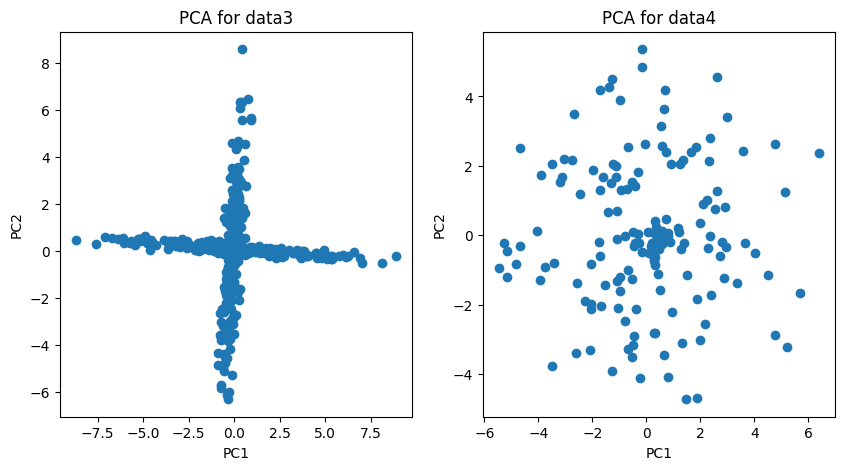

Data3 explained variance ratios: [0.593217 0.406783]
Data4 explained variance ratios: [0.51239992 0.42758716 0.06001292]


In [42]:
pca3 = PCA()
pca3.fit(data3)

pca4 = PCA()
pca4.fit(data4)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].scatter(pca3.transform(data3)[:,0], pca3.transform(data3)[:,1])
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[0].set_title('PCA for data3')

ax[1].scatter(pca4.transform(data4)[:,0], pca4.transform(data4)[:,1])
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2')
ax[1].set_title('PCA for data4')

plt.show()

print('Data3 explained variance ratios:', pca3.explained_variance_ratio_)
print('Data4 explained variance ratios:', pca4.explained_variance_ratio_)

<h3 style="color:rgb(0,120,170)">Exercise 7 (20 points):</h3>

* Perform Kernel PCA on both datasets. Try polynomial and RBF-kernels. For polynomial kernel use at least the parameters $\gamma=2$ and degree $3$, for RBF $\gamma=0.25$. You are of course allowed (and encourgaged) to try more different parameters and also different kernels to get a better feeling.

* Also visualize the projected data together with the original ones. 

* Finally, visualize the projection onto the first principal component in the RBF-kernel plots for data4 (can also be done together in one plot). This should also convince you about the fact that the first PC already contains a huge part of the information of the data, e.g. the data can already be well separated by the first PC. 

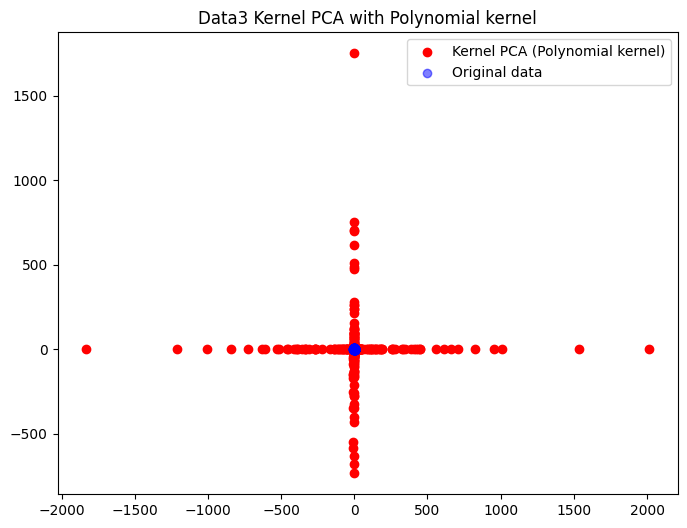

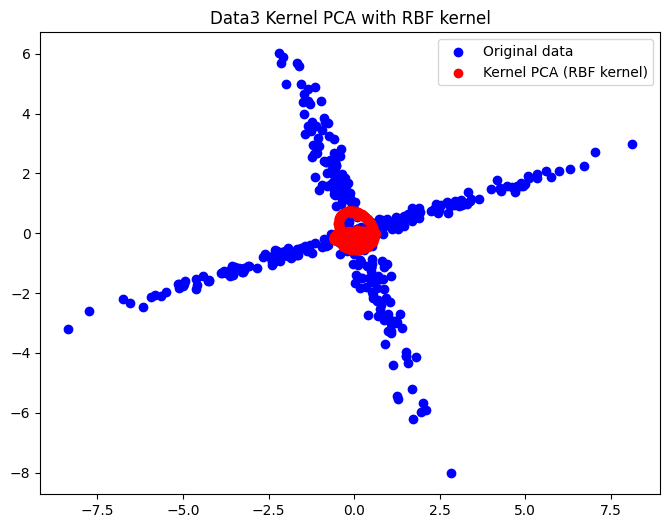

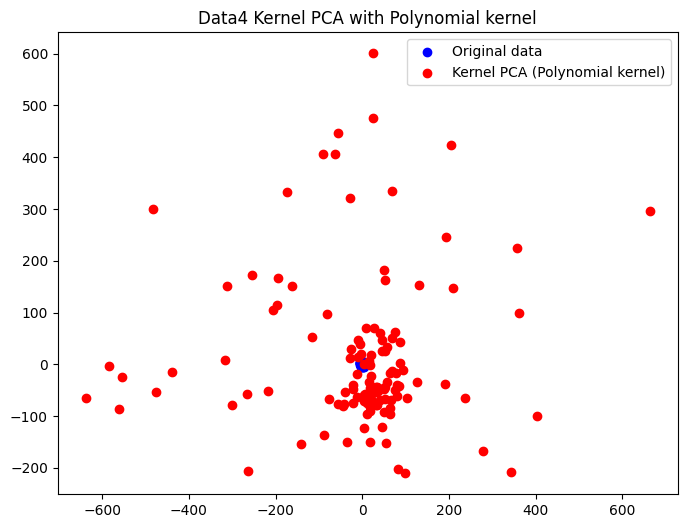

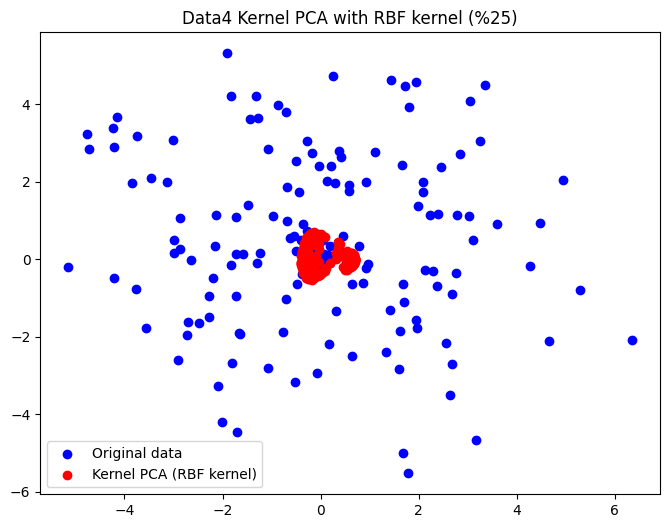

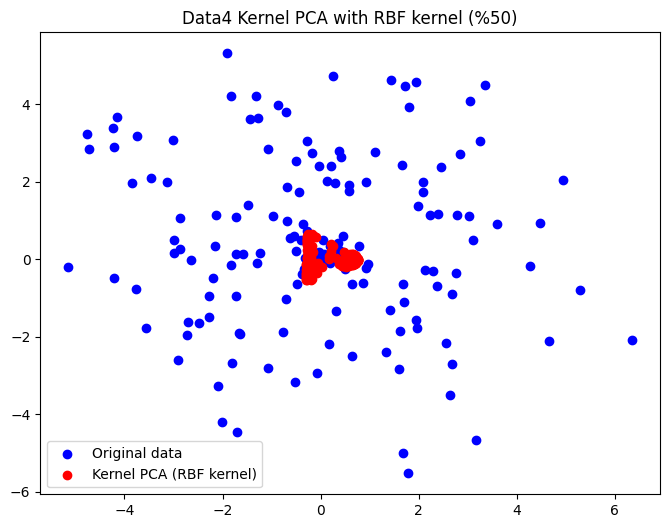

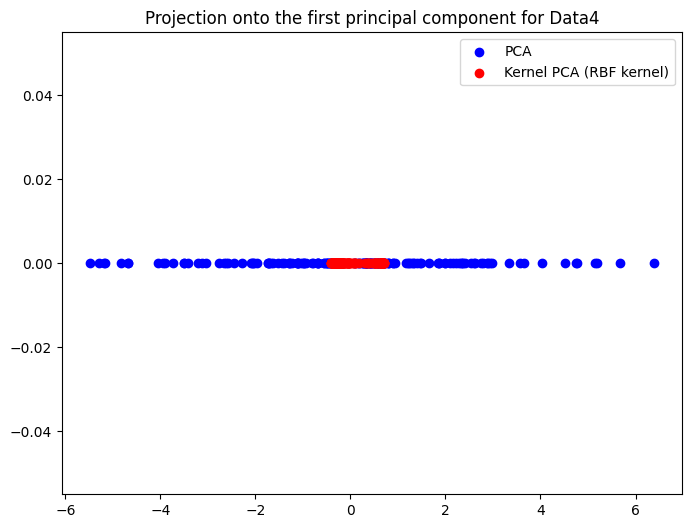

In [58]:
# Kernel PCA with polynomial kernel for data3
kpca_poly_3 = KernelPCA(n_components=2, kernel='poly', gamma=2, degree=3)
data3_kpca_poly = kpca_poly_3.fit_transform(data3)

# Kernel PCA with RBF kernel for data3
kpca_rbf_3 = KernelPCA(n_components=2, kernel='rbf', gamma=0.25)
data3_kpca_rbf = kpca_rbf_3.fit_transform(data3)

# Kernel PCA with polynomial kernel for data4
kpca_poly_4 = KernelPCA(n_components=3, kernel='poly', gamma=2, degree=3)
data4_kpca_poly = kpca_poly_4.fit_transform(data4)

# Kernel PCA with RBF kernel for data4
kpca_rbf_4 = KernelPCA(n_components=3, kernel='rbf', gamma=0.25)
data4_kpca_rbf = kpca_rbf_4.fit_transform(data4)

# Kernel PCA with RBF kernel for data4
kpca_rbf_5 = KernelPCA(n_components=3, kernel='rbf', gamma=0.50)
data4_kpca_rbf_5 = kpca_rbf_5.fit_transform(data4)

# Visualize Kernel PCA with polynomial kernel for data3
plt.figure(figsize=(8, 6))
plt.scatter(data3_kpca_poly[:, 0], data3_kpca_poly[:, 1], c='r', label='Kernel PCA (Polynomial kernel)')
plt.scatter(data3[:, 0], data3[:, 1], c='b', alpha=0.5, label='Original data')
plt.legend()
plt.title('Data3 Kernel PCA with Polynomial kernel')
plt.show()

# Visualize Kernel PCA with RBF kernel for data3
plt.figure(figsize=(8, 6))
plt.scatter(data3[:, 0], data3[:, 1], c='b', label='Original data')
plt.scatter(data3_kpca_rbf[:, 0], data3_kpca_rbf[:, 1], c='r', label='Kernel PCA (RBF kernel)')
plt.legend()
plt.title('Data3 Kernel PCA with RBF kernel')
plt.show()

# Visualize Kernel PCA with polynomial kernel for data4
fig = plt.figure(figsize=(8, 6))
plt.scatter(data4[:, 0], data4[:, 1], c='b', label='Original data')
plt.scatter(data4_kpca_poly[:, 0], data4_kpca_poly[:, 1], c='r', label='Kernel PCA (Polynomial kernel)')
plt.legend()
plt.title('Data4 Kernel PCA with Polynomial kernel')
plt.show()

# Visualize Kernel PCA with RBF kernel for data4
fig = plt.figure(figsize=(8, 6))
plt.scatter(data4[:, 0], data4[:, 1], c='b', label='Original data')
plt.scatter(data4_kpca_rbf[:, 0], data4_kpca_rbf[:, 1], c='r', label='Kernel PCA (RBF kernel)')
plt.legend()
plt.title('Data4 Kernel PCA with RBF kernel (%25)')
plt.show()

# Visualize Kernel PCA with RBF kernel for data4
fig = plt.figure(figsize=(8, 6))
plt.scatter(data4[:, 0], data4[:, 1], c='b', label='Original data')
plt.scatter(data4_kpca_rbf_5[:, 0], data4_kpca_rbf_5[:, 1], c='r', label='Kernel PCA (RBF kernel)')
plt.legend()
plt.title('Data4 Kernel PCA with RBF kernel (%50)')
plt.show()

# Plot the projection onto the first principal component for both PCA and Kernel PCA (RBF kernel)
data4_pca = pca4.transform(data4)
plt.figure(figsize=(8, 6))
plt.scatter(data4_pca[:, 0], np.zeros_like(data4_pca[:, 0]), c='b', label='PCA')
plt.scatter(data4_kpca_rbf[:, 0], np.zeros_like(data4_kpca_rbf[:, 0]), c='r', label='Kernel PCA (RBF kernel)')
plt.legend()
plt.title('Projection onto the first principal component for Data4')
plt.show()


<h3 style="color:rgb(0,120,170)">Exercise 8 (10 points):</h3>

Can you observe advantages/disadvantages of Kernel PCA compared to PCA without
using a kernel? For which kind of data do you observe them?


Kernel PCA can be useful when the number of features is large and capture more nonlinear information. However, it consumes more time than PCA and sometimes PCA may work fairly well to store information about the data. In that case, kernel PCA can be waste of time. Moreover, if data is linear, again PCA can do a great job instead of kernel PCA.